In [1]:
from typing import Callable, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

from Model import *
from SubjectiveLogic import Hyperopinion
from SubjectiveLogic import Hyperopinion as W
from SubjectiveLogic import HyperopinionInterface
from SubjectiveLogic.BeliefFusion import (averaging_fusion, cumulative_fusion,
                                          weighted_fusion)
from SubjectiveLogic.Trust import trust_discount_2e

import math


In [2]:
def simulate(belief_array: BeliefArray, influence_graph: InfluenceGraph = [[1, 1], [1, 1]], steps=100) -> SLModel:
    akv_model = AKVModel(belief_array, influence_graph)
    sl_model_cumulative = akv_to_sl(akv_model)
    # print(sl_model_cumulative.states[0][0].P[0], sl_model_cumulative.states[0][1].P[0])
    sl_model_cumulative.simulate(steps, cumulative_fusion)
    return sl_model_cumulative


In [3]:
def findFixedPoint(beliefA: float) -> float:
    def f(x):
        a = simulate([beliefA, x]).states[-1][1].P[0]
        return a

    def binarySearch(low: float, high: float) -> float:
        if (high >= low):
            mid = low + (high - low) / 2
        fmid = f(mid)
        print(mid, fmid)
        if np.isclose(mid, 1, 1e-02) or np.isclose(mid, 0.5, 1e-02):
            return None
        if fmid < beliefA:
            return binarySearch(mid, high)
        if np.isclose(beliefA, fmid, 1e-02):
            return mid
        if fmid > beliefA:
            return binarySearch(low, mid)

    if beliefA < 0.5:
        return binarySearch(0.5 + 0.001, 1 - 0.001)
    else:
        return binarySearch(0 + 0.001, 0.5 - 0.001)


In [ ]:
findFixedPoint(0.3)

In [4]:
x = []
y = []
for i in np.arange(0.01, 0.5, 0.01):
    x += [i]
    y += [findFixedPoint(i)]
for i in np.arange(0.51, 1, 0.01):
    x += [i]
    y += [findFixedPoint(i)]
x = np.array(x)
y = np.array(y)
x, y

0.75 0.020000500000000015
0.6255 0.006793499999999959
0.68775 0.012122500000000015
0.656625 0.009222500000000014
0.6721874999999999 0.010606500000000015
0.66440625 0.009898500000000015
0.668296875 0.010248499999999959
0.6663515625 0.010072500000000014
0.75 0.039999500000000014
0.6255 0.013770500000000014
0.68775 0.024440500000000014
0.656625 0.01865049999999996
0.6721874999999999 0.021417500000000013
0.66440625 0.020004500000000015
0.75 0.06000049999999996
0.6255 0.020941500000000016
0.68775 0.036961500000000015
0.656625 0.028290499999999958
0.6721874999999999 0.03243950000000002
0.66440625 0.030320500000000014
0.6605156249999999 0.029295500000000016
0.6624609374999999 0.029805500000000016
0.66343359375 0.030063500000000014
0.75 0.08000050000000002
0.6255 0.028314500000000013
0.68775 0.04968850000000002
0.656625 0.03815050000000002
0.6721874999999999 0.043680499999999955
0.66440625 0.040860500000000015
0.6605156249999999 0.03949050000000001
0.6624609374999999 0.040170499999999956
0.75 

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
        0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
        0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
        0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
        0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
 array([0.66635156, 0.66440625, 0.66343359, 0.66246094, 0.66148828,
        0.66051562, 0.65857031, 0.65759766, 0.65565234, 0.65467969,
        0.65273437, 0.65176172, 0.64981641, 0.64787109, 0.64689844,
        0.64495313, 0.64300781, 0.6410625 , 0.63911719, 0.63717187,
        0.63522656, 0.63328125, 0.63036328, 0.62841797, 0.6255    

In [67]:
x[-17], y[-17]

(0.8300000000000003, 0.3589375)

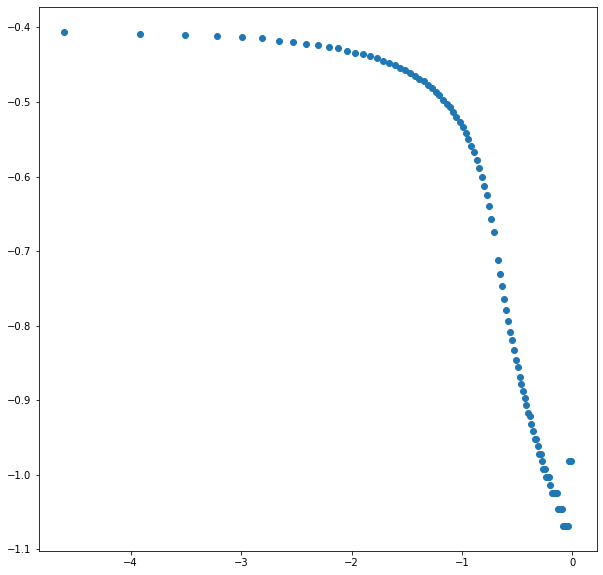

In [5]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(np.log(x), np.log(y))
# plt.title("Fixed points for P(A) in (0, 0.5)")
# plt.xlabel("P(A)")
# plt.ylabel("P(B)")
# plt.xlim([0, 1])
# plt.ylim([0, 1])

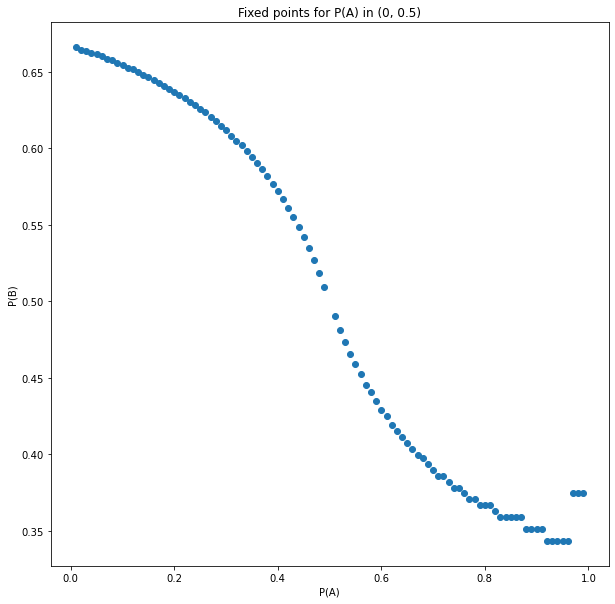

In [65]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(x, y)
plt.title("Fixed points for P(A) in (0, 0.5)")
plt.xlabel("P(A)")
plt.ylabel("P(B)")
plt.show()

In [42]:
y

array([0.6663515625, 0.66440625, 0.66343359375, 0.6624609374999999,
       0.6614882812499999, 0.6605156249999999, 0.6585703125,
       0.65759765625, 0.65565234375, 0.6546796875, 0.652734375,
       0.65176171875, 0.6498164062499999, 0.64787109375, 0.6468984375,
       0.644953125, 0.6430078125, 0.6410625, 0.6391171874999999,
       0.6371718749999999, 0.6352265625, 0.63328125, 0.63036328125,
       0.62841796875, 0.6255, 0.6235546875, 0.62063671875, 0.61771875,
       0.6148007812499999, 0.6118828125, 0.6079921875000001,
       0.60507421875, 0.60215625, 0.598265625, 0.594375, 0.590484375,
       0.58659375, 0.58173046875, 0.5768671875, 0.57200390625,
       0.567140625, 0.5613046875000001, 0.55546875, 0.54866015625,
       0.5418515625, 0.53504296875, 0.52726171875, 0.5187509765625,
       0.5097539062499999, list([0.49048925781249997]),
       list([0.4814921875]), list([0.4737109375]),
       list([0.46592968749999997]), list([0.45912109375]),
       list([0.4523125]), list([0.445

In [44]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

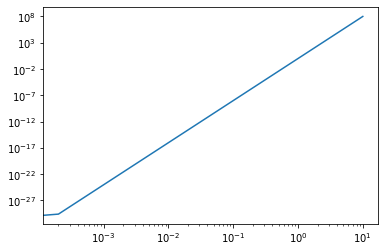

In [52]:
# inputs to plot using loglog plot
x_input = np.linspace(0, 10, 50000)
 
y_input = x_input**8
 
# plotting the value of x_input and y_input using loglog plot
plt.loglog(x_input, y_input)